Digit the ticker and look at the balance sheet and income statement reclassification


In [25]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
ticker=input("digita ticker ").upper()
url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey=SO1JL3KXGVU0J4HC'
r = requests.get(url)
data = r.json()
print(data)



{'symbol': 'AAPL', 'annualReports': [{'fiscalDateEnding': '2024-09-30', 'reportedCurrency': 'USD', 'totalAssets': '364980000000', 'totalCurrentAssets': '152987000000', 'cashAndCashEquivalentsAtCarryingValue': '29943000000', 'cashAndShortTermInvestments': '65171000000', 'inventory': '7286000000', 'currentNetReceivables': '66243000000', 'totalNonCurrentAssets': '211993000000', 'propertyPlantEquipment': '45680000000', 'accumulatedDepreciationAmortizationPPE': '73448000000', 'intangibleAssets': 'None', 'intangibleAssetsExcludingGoodwill': 'None', 'goodwill': 'None', 'investments': '254763000000', 'longTermInvestments': '91479000000', 'shortTermInvestments': '35228000000', 'otherCurrentAssets': '14287000000', 'otherNonCurrentAssets': '74834000000', 'totalLiabilities': '308030000000', 'totalCurrentLiabilities': '176392000000', 'currentAccountsPayable': '68960000000', 'deferredRevenue': '21049000000', 'currentDebt': '21023000000', 'shortTermDebt': '9967000000', 'totalNonCurrentLiabilities': '

In [26]:
db=pd.DataFrame(data["annualReports"])
db1=db[["fiscalDateEnding","totalAssets","totalLiabilities","reportedCurrency","totalCurrentAssets","totalNonCurrentAssets","totalCurrentLiabilities","totalNonCurrentLiabilities","shortTermDebt","longTermDebt","cashAndShortTermInvestments"]]

In [27]:

url2 = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker}&apikey=JC7HIING3L8QAD4X'
r2 = requests.get(url2)
ist = r2.json()
d=ist["annualReports"]
df2=pd.DataFrame(d)
df2=df2[["fiscalDateEnding","totalRevenue","grossProfit","operatingIncome","incomeBeforeTax","netIncome","ebitda"]]
df2["fiscalDateEnding"]=pd.to_datetime(df2["fiscalDateEnding"]).dt.year
df2=df2.rename(columns={"grossProfit":"ROGC","ebitda":"mol","operatingIncome":"ROA","fiscalDateEnding":"date"})
for x in df2.columns:
    try:
        df2[x]=df2[x].astype(float)
    except:
        pass
df2

,date,totalRevenue,ROGC,ROA,incomeBeforeTax,netIncome,mol
0,2024.0,3.910350e+11,1.806830e+11,1.232160e+11,1.234850e+11,9.373600e+10,1.346610e+11
1,2023.0,3.793520e+11,1.691480e+11,1.143010e+11,1.137360e+11,9.699500e+10,1.258200e+11
2,2022.0,3.913970e+11,1.707820e+11,1.194370e+11,1.191030e+11,9.980300e+10,1.305410e+11
3,2021.0,3.631720e+11,1.528360e+11,1.089490e+11,1.092070e+11,9.468000e+10,1.202330e+11
4,2020.0,2.716420e+11,1.049560e+11,6.628800e+10,6.709100e+10,5.741100e+10,7.734400e+10
5,2019.0,2.565980e+11,9.839200e+10,6.393000e+10,6.573700e+10,5.525600e+10,7.647700e+10
6,2018.0,2.655950e+11,1.018390e+11,7.089800e+10,7.290300e+10,5.953100e+10,8.180100e+10
7,2017.0,2.292340e+11,8.818600e+10,6.134400e+10,6.408900e+10,4.835100e+10,6.761200e+10
8,2016.0,2.156390e+11,8.426300e+10,6.002400e+10,6.137200e+10,4.568700e+10,7.112800e+10
9,2015.0,2.329820e+11,9.362600e+10,7.123000e+10,7.251500e+10,5.339400e+10,8.244800e+10


In [28]:
db1

,fiscalDateEnding,totalAssets,totalLiabilities,reportedCurrency,totalCurrentAssets,totalNonCurrentAssets,totalCurrentLiabilities,totalNonCurrentLiabilities,shortTermDebt,longTermDebt,cashAndShortTermInvestments
0,2024-09-30,364980000000,308030000000,USD,152987000000,211993000000,176392000000,131638000000,9967000000,96662000000,65171000000
1,2023-09-30,352583000000,290437000000,USD,143566000000,209017000000,145308000000,145129000000,5985000000,105103000000,61555000000
2,2022-09-30,352755000000,302083000000,USD,135405000000,217350000000,153982000000,148101000000,9982000000,110087000000,48304000000
3,2021-09-30,351002000000,287912000000,USD,134836000000,216166000000,125481000000,162431000000,6000000000,118700000000,62639000000
4,2020-09-30,323888000000,258549000000,USD,143713000000,180175000000,105392000000,153157000000,4996000000,125873000000,90943000000
5,2019-09-30,338516000000,248028000000,USD,162819000000,175697000000,105718000000,142310000000,5980000000,117760000000,100557000000
6,2018-09-30,365725000000,258578000000,USD,131339000000,234386000000,115929000000,142649000000,11964000000,111984000000,25913000000
7,2017-09-30,375319000000,241272000000,USD,128645000000,246674000000,100814000000,140458000000,11977000000,112596000000,74181000000
8,2016-09-30,321686000000,193437000000,USD,106869000000,385247000000,79006000000,150505000000,8100000000,85200000000,67155000000
9,2015-09-30,290345000000,170990000000,USD,89378000000,365166000000,80610000000,123941000000,8499000000,57400000000,41601000000


In [29]:
db1.dtypes

fiscalDateEnding               object
totalAssets                    object
totalLiabilities               object
reportedCurrency               object
totalCurrentAssets             object
totalNonCurrentAssets          object
totalCurrentLiabilities        object
totalNonCurrentLiabilities     object
shortTermDebt                  object
longTermDebt                   object
cashAndShortTermInvestments    object
dtype: object

In [30]:
def eliminanone(x):
    if x=="None":
        return "NaN"
    else:
        return x

for x in db1.columns:
    if db1[x].dtypes=="object":
        db1[x]=db1[x].apply(eliminanone)
db1

,fiscalDateEnding,totalAssets,totalLiabilities,reportedCurrency,totalCurrentAssets,totalNonCurrentAssets,totalCurrentLiabilities,totalNonCurrentLiabilities,shortTermDebt,longTermDebt,cashAndShortTermInvestments
0,2024-09-30,364980000000,308030000000,USD,152987000000,211993000000,176392000000,131638000000,9967000000,96662000000,65171000000
1,2023-09-30,352583000000,290437000000,USD,143566000000,209017000000,145308000000,145129000000,5985000000,105103000000,61555000000
2,2022-09-30,352755000000,302083000000,USD,135405000000,217350000000,153982000000,148101000000,9982000000,110087000000,48304000000
3,2021-09-30,351002000000,287912000000,USD,134836000000,216166000000,125481000000,162431000000,6000000000,118700000000,62639000000
4,2020-09-30,323888000000,258549000000,USD,143713000000,180175000000,105392000000,153157000000,4996000000,125873000000,90943000000
5,2019-09-30,338516000000,248028000000,USD,162819000000,175697000000,105718000000,142310000000,5980000000,117760000000,100557000000
6,2018-09-30,365725000000,258578000000,USD,131339000000,234386000000,115929000000,142649000000,11964000000,111984000000,25913000000
7,2017-09-30,375319000000,241272000000,USD,128645000000,246674000000,100814000000,140458000000,11977000000,112596000000,74181000000
8,2016-09-30,321686000000,193437000000,USD,106869000000,385247000000,79006000000,150505000000,8100000000,85200000000,67155000000
9,2015-09-30,290345000000,170990000000,USD,89378000000,365166000000,80610000000,123941000000,8499000000,57400000000,41601000000


In [31]:

for x in db1.columns:
    try:
        db1[x]=db1[x].astype(float)
    except:
        pass
db1["fiscalDateEnding"]=pd.to_datetime(db1["fiscalDateEnding"])

db1["fiscalDateEnding"]=db1["fiscalDateEnding"].dt.year
db1=db1.rename(columns={"totalAssets":"invested_capital","reportedCurrency":"currency","totalLiabilities":"mezzi_di_terzi","fiscalDateEnding":"date","cashAndShortTermInvestments":"liquidità immediata"})
db1["mezzi_propri"]=db1["invested_capital"]-db1["mezzi_di_terzi"]
db1.dtypes
db1["debt"]=db1["shortTermDebt"]+db1["longTermDebt"]
db1=db1.drop(columns=["shortTermDebt","longTermDebt"])

db1=pd.merge(db1,df2, left_on="date", right_on="date",how="inner")
db1.insert(1,"ticker",ticker)
db1["ROI"]=db1["ROA"]/db1["invested_capital"]*100 
db1["ROE"]=db1["netIncome"]/db1["mezzi_propri"]
db1["CCN"]=db1["totalCurrentAssets"]-db1["totalCurrentLiabilities"]
db1

,date,ticker,invested_capital,mezzi_di_terzi,currency,totalCurrentAssets,totalNonCurrentAssets,totalCurrentLiabilities,totalNonCurrentLiabilities,liquidità immediata,...,debt,totalRevenue,ROGC,ROA,incomeBeforeTax,netIncome,mol,ROI,ROE,CCN
0,2024,AAPL,3.649800e+11,3.080300e+11,USD,1.529870e+11,2.119930e+11,1.763920e+11,1.316380e+11,6.517100e+10,...,1.066290e+11,3.910350e+11,1.806830e+11,1.232160e+11,1.234850e+11,9.373600e+10,1.346610e+11,33.759658,1.645935,-2.340500e+10
1,2023,AAPL,3.525830e+11,2.904370e+11,USD,1.435660e+11,2.090170e+11,1.453080e+11,1.451290e+11,6.155500e+10,...,1.110880e+11,3.793520e+11,1.691480e+11,1.143010e+11,1.137360e+11,9.699500e+10,1.258200e+11,32.418182,1.560760,-1.742000e+09
2,2022,AAPL,3.527550e+11,3.020830e+11,USD,1.354050e+11,2.173500e+11,1.539820e+11,1.481010e+11,4.830400e+10,...,1.200690e+11,3.913970e+11,1.707820e+11,1.194370e+11,1.191030e+11,9.980300e+10,1.305410e+11,33.858344,1.969589,-1.857700e+10
3,2021,AAPL,3.510020e+11,2.879120e+11,USD,1.348360e+11,2.161660e+11,1.254810e+11,1.624310e+11,6.263900e+10,...,1.247000e+11,3.631720e+11,1.528360e+11,1.089490e+11,1.092070e+11,9.468000e+10,1.202330e+11,31.039424,1.500713,9.355000e+09
4,2020,AAPL,3.238880e+11,2.585490e+11,USD,1.437130e+11,1.801750e+11,1.053920e+11,1.531570e+11,9.094300e+10,...,1.308690e+11,2.716420e+11,1.049560e+11,6.628800e+10,6.709100e+10,5.741100e+10,7.734400e+10,20.466334,0.878664,3.832100e+10
5,2019,AAPL,3.385160e+11,2.480280e+11,USD,1.628190e+11,1.756970e+11,1.057180e+11,1.423100e+11,1.005570e+11,...,1.237400e+11,2.565980e+11,9.839200e+10,6.393000e+10,6.573700e+10,5.525600e+10,7.647700e+10,18.885370,0.610645,5.710100e+10
6,2018,AAPL,3.657250e+11,2.585780e+11,USD,1.313390e+11,2.343860e+11,1.159290e+11,1.426490e+11,2.591300e+10,...,1.239480e+11,2.655950e+11,1.018390e+11,7.089800e+10,7.290300e+10,5.953100e+10,8.180100e+10,19.385604,0.555601,1.541000e+10
7,2017,AAPL,3.753190e+11,2.412720e+11,USD,1.286450e+11,2.466740e+11,1.008140e+11,1.404580e+11,7.418100e+10,...,1.245730e+11,2.292340e+11,8.818600e+10,6.134400e+10,6.408900e+10,4.835100e+10,6.761200e+10,16.344496,0.360702,2.783100e+10
8,2016,AAPL,3.216860e+11,1.934370e+11,USD,1.068690e+11,3.852470e+11,7.900600e+10,1.505050e+11,6.715500e+10,...,9.330000e+10,2.156390e+11,8.426300e+10,6.002400e+10,6.137200e+10,4.568700e+10,7.112800e+10,18.659189,0.356237,2.786300e+10
9,2015,AAPL,2.903450e+11,1.709900e+11,USD,8.937800e+10,3.651660e+11,8.061000e+10,1.239410e+11,4.160100e+10,...,6.589900e+10,2.329820e+11,9.362600e+10,7.123000e+10,7.251500e+10,5.339400e+10,8.244800e+10,24.532883,0.447355,8.768000e+09


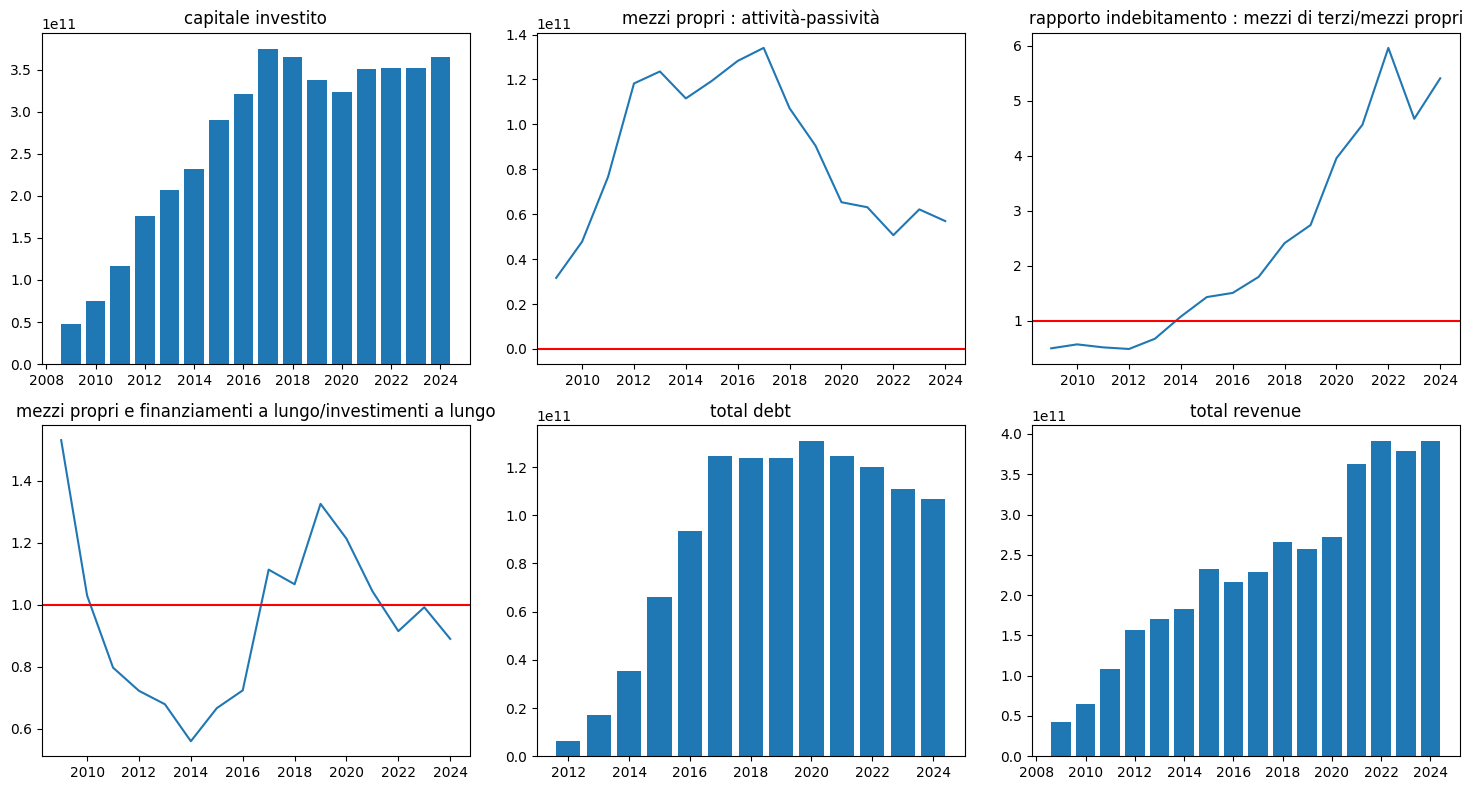

In [32]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))


axs[0, 0].bar(db1["date"], db1["invested_capital"])
axs[0, 0].set_title("capitale investito")


axs[0, 1].plot(db1["date"], db1["mezzi_propri"])
axs[0, 1].set_title("mezzi propri : attività-passività")
axs[0, 1].axhline(0, color="red")


axs[0, 2].plot(db1["date"], db1["mezzi_di_terzi"] / db1["mezzi_propri"])
axs[0, 2].set_title("rapporto indebitamento : mezzi di terzi/mezzi propri")
axs[0, 2].axhline(1, color="red")

axs[1, 0].plot(db1["date"], (db1["mezzi_propri"] + db1["totalNonCurrentLiabilities"]) / db1["totalNonCurrentAssets"])
axs[1, 0].set_title("mezzi propri e finanziamenti a lungo/investimenti a lungo")
axs[1, 0].axhline(1, color="red")

axs[1, 1].bar(db1["date"], db1["debt"])
axs[1, 1].set_title("total debt")

axs[1, 2].bar(db1["date"], db1["totalRevenue"])
axs[1, 2].set_title("total revenue")


plt.tight_layout()

plt.show()

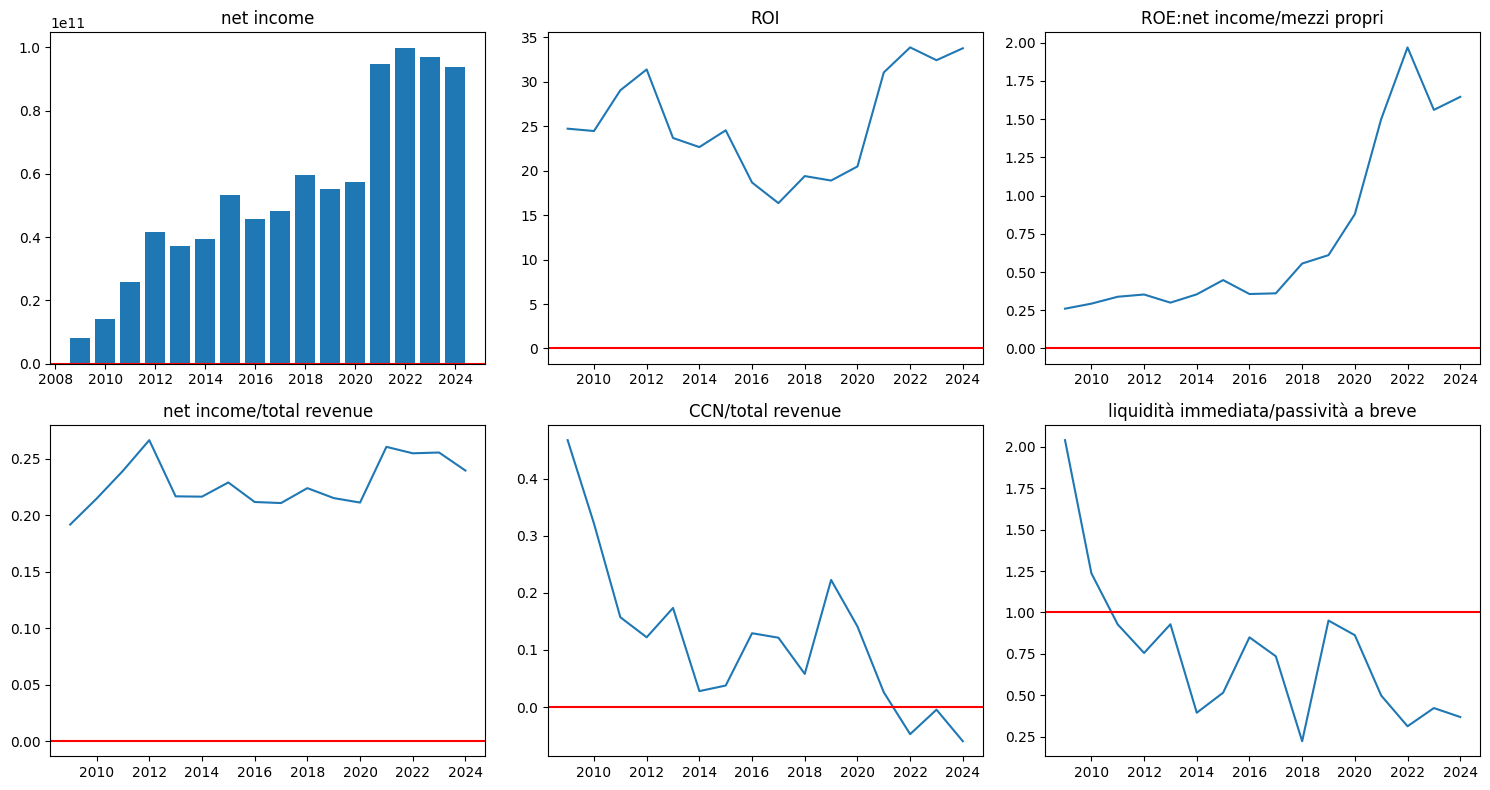

In [33]:

fig, axs = plt.subplots(2, 3, figsize=(15, 8))


axs[0, 0].bar(db1["date"], db1["netIncome"])
axs[0, 0].set_title("net income")
axs[0, 0].axhline(0, color="red")


axs[0, 1].plot(db1["date"], db1["ROI"])
axs[0, 1].set_title("ROI")
axs[0, 1].axhline(0, color="red")


axs[0, 2].plot(db1["date"], db1["ROE"])
axs[0, 2].set_title("ROE:net income/mezzi propri")
axs[0, 2].axhline(0, color="red")

axs[1, 0].plot(db1["date"], db1["netIncome"] / db1["totalRevenue"])
axs[1, 0].set_title("net income/total revenue")
axs[1, 0].axhline(0, color="red")

axs[1, 1].plot(db1["date"], db1["CCN"] / db1["totalRevenue"])
axs[1, 1].set_title("CCN/total revenue")
axs[1, 1].axhline(0, color="red")

axs[1, 2].plot(db1["date"], db1["liquidità immediata"] / db1["totalCurrentLiabilities"])
axs[1, 2].set_title("liquidità immediata/passività a breve")
axs[1, 2].axhline(1, color="red")


plt.tight_layout()
plt.show()